In [2]:
# importing libraries
import numpy as np            # data science essentials
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling
import sklearn.linear_model # linear models
from sklearn.model_selection import train_test_split # train/test split
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.neighbors import KNeighborsRegressor # KNN Regression
from sklearn.ensemble import GradientBoostingRegressor # Gradient Bossting Regression
from sklearn.ensemble import RandomForestRegressor # RandomForestRegressor
from sklearn.model_selection import GridSearchCV # CV using Grid Search

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python
original_df = pd.read_excel(file)


In [3]:
# showing the first rows of the DataFrame
original_df.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [4]:
# Analysis of the missing value
original_df.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [5]:
# creating dropped dataset 
original_df = original_df.dropna()

original_df.isnull().sum().sum()

original_df.to_excel("original_df_without_na.xlsx", index = False)

In [6]:
# splitting the emails

# safety measure in case of multiple concatenations
original_df = pd.read_excel('original_df_without_na.xlsx')

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)

In [7]:
# concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['0' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, email_df['email_domain']],
                     axis = 1)

In [8]:
# email domain types
personal_email_domains = ['@gmail.com', '@yahoo.com', '@protonmail.com']
junk_email_domains  = ['@me.com', '@aol.com', '@hotmail.com',
                       '@live.com', '@msn.com', '@passport.com']
prof_email_domains  = ['@mmm.com', '@amex.com', '@apple.com',
                       '@boeing.com', '@caterpillar.com', '@chevron.com',
                       '@cisco.com', '@cocacola.com', '@disney.com', 
                       '@dupont.com', '@exxon.com', '@ge.org', 
                       '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                       '@intel.com', '@jnj.com', '@jpmorgan.com', 
                       '@mcdonalds.com', '@merck.com', '@microsoft.com', 
                       '@nike.com', '@pfizer.com', '@pg.com', 
                       '@travelers.com', '@unitedtech.com', '@unitedhealth.com',
                       '@verizon.com', '@visa.com', '@walmart.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in original_df['email_domain']:
    
    if '@' + str(domain) in personal_email_domains:
        placeholder_lst.append('personal')
        

    elif '@' + str(domain) in junk_email_domains:
        placeholder_lst.append('junk')
        
        
    elif '@' + str(domain) in prof_email_domains:
        placeholder_lst.append('professional')


    else:
        print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# checking results
original_df['domain_group'].value_counts()

personal        845
professional    678
junk            376
Name: domain_group, dtype: int64

In [9]:
# get dummies for domain group
dummies = pd.get_dummies(original_df['domain_group'])

# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, dummies],
                     axis = 1)

# verifying
original_df.head()

# converting the dummies to int64
original_df['junk'] = np.int64(original_df['junk'])
original_df['personal'] = np.int64(original_df['personal'])
original_df['professional'] = np.int64(original_df['professional'])

In [10]:
# creating new column for revenue per order

original_df['revenue_per_order'] = original_df['REVENUE'] / original_df['TOTAL_MEALS_ORDERED']

# creating new variable for whether customer orders drinks

original_df['drink_ordered'] = [1 if x > 23 else 0 for x in original_df['revenue_per_order']] 

# Target variable as log
original_df['log_REVENUE'] = np.log(original_df['REVENUE'])

/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

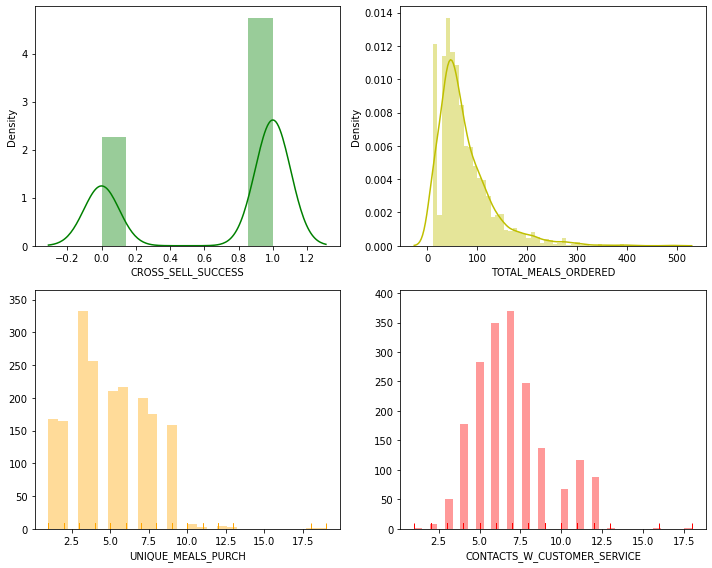

/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

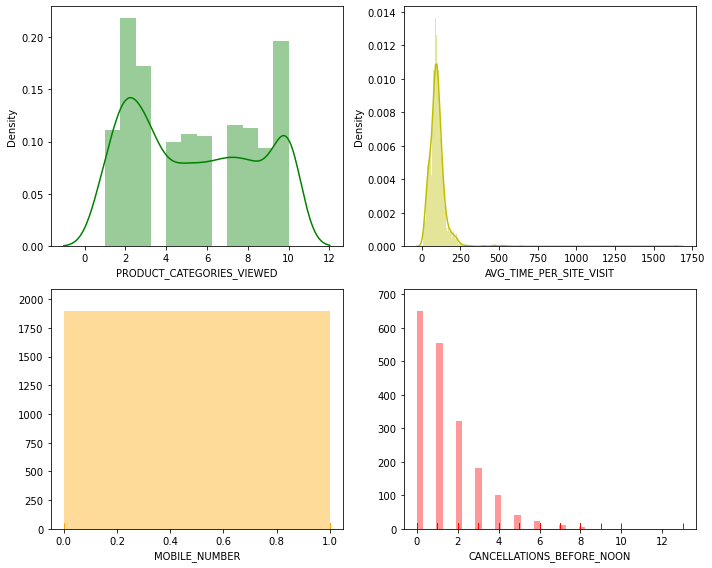

/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)

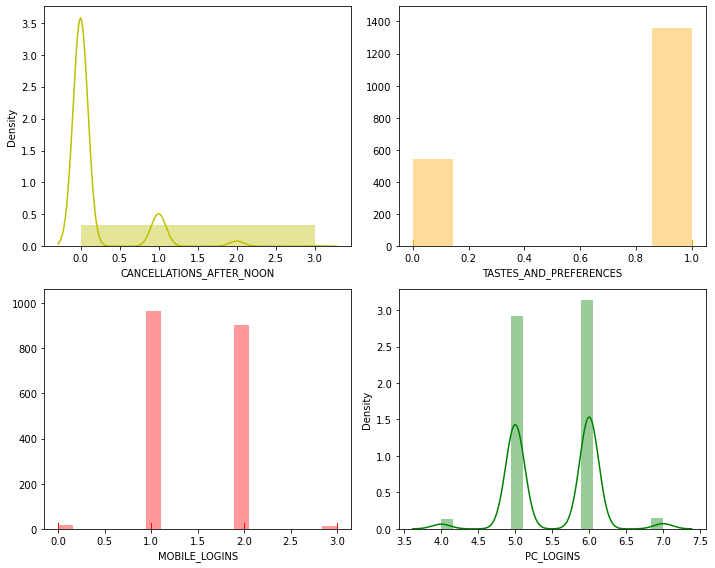

/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)

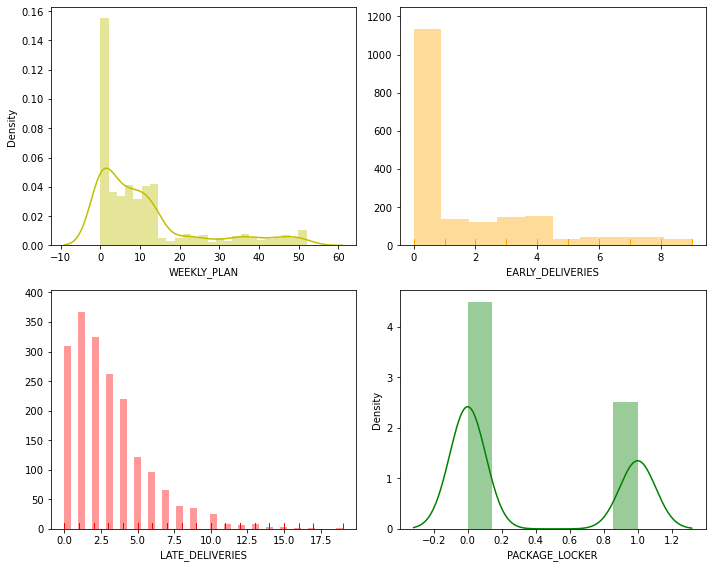

/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)

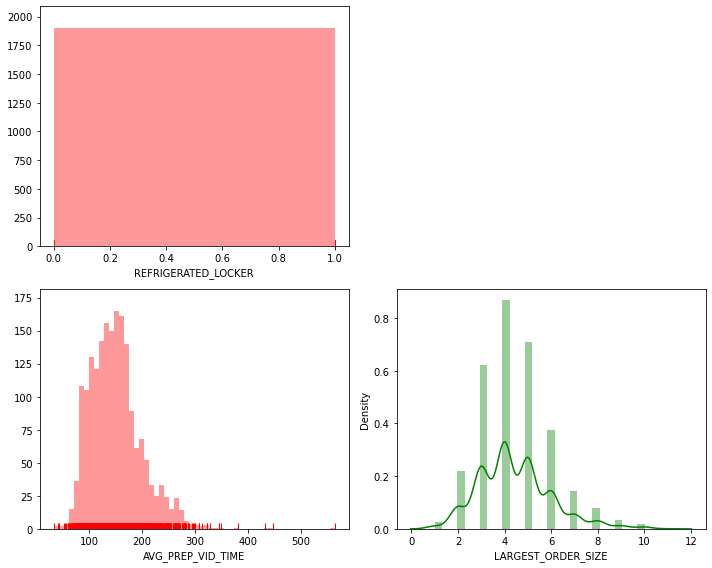

/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)

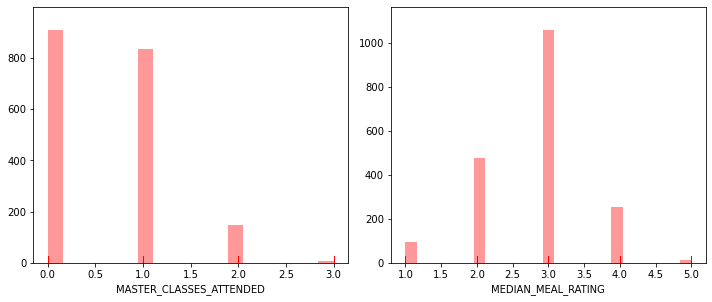

/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/joshuadienye/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)

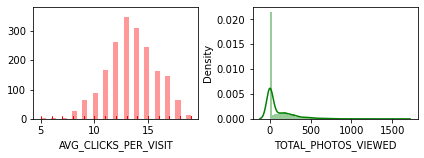

In [11]:
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')


########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.tight_layout()
plt.show()

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

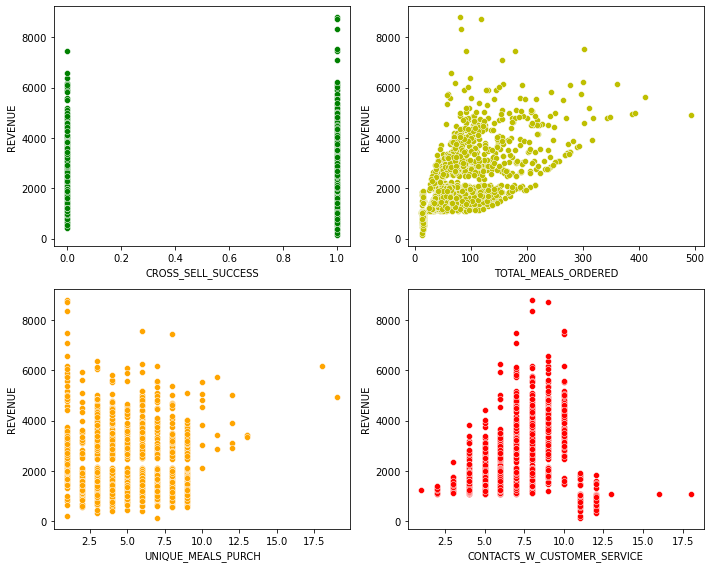

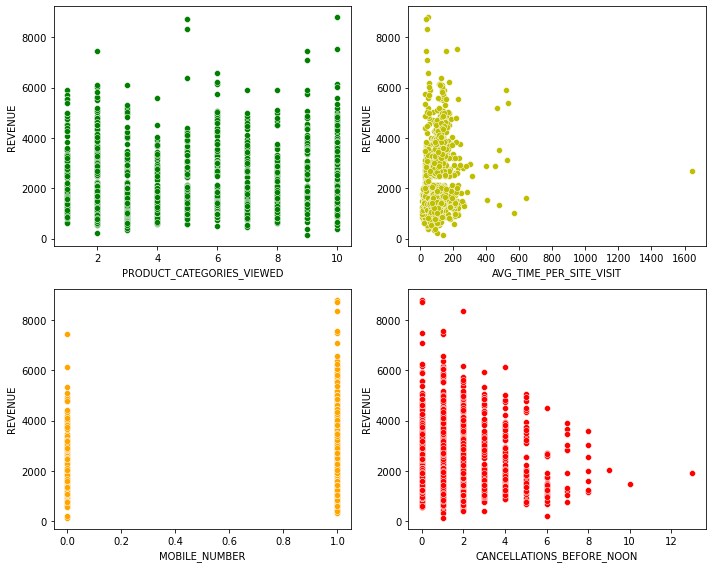

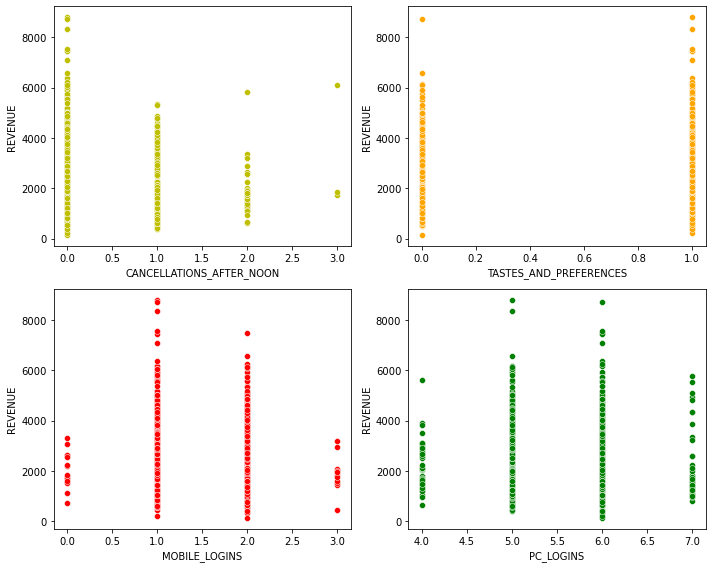

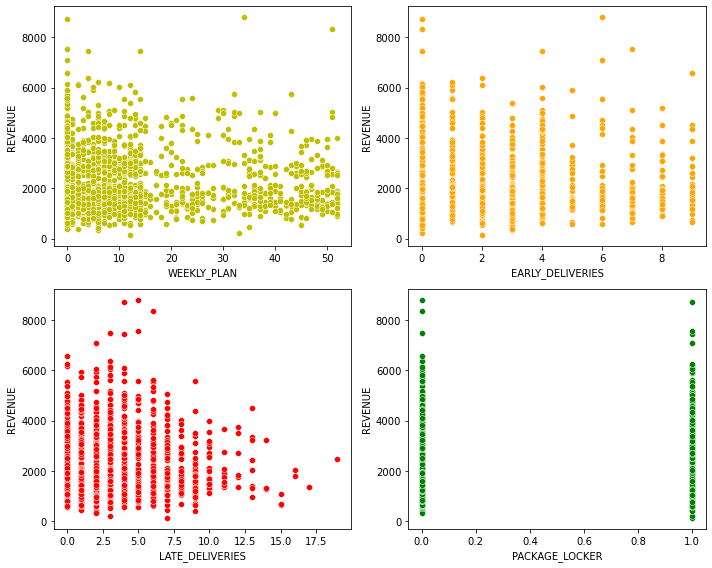

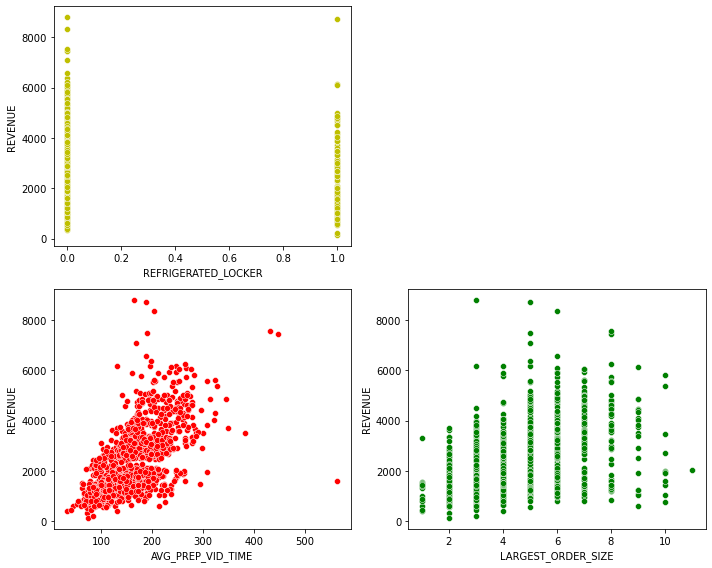

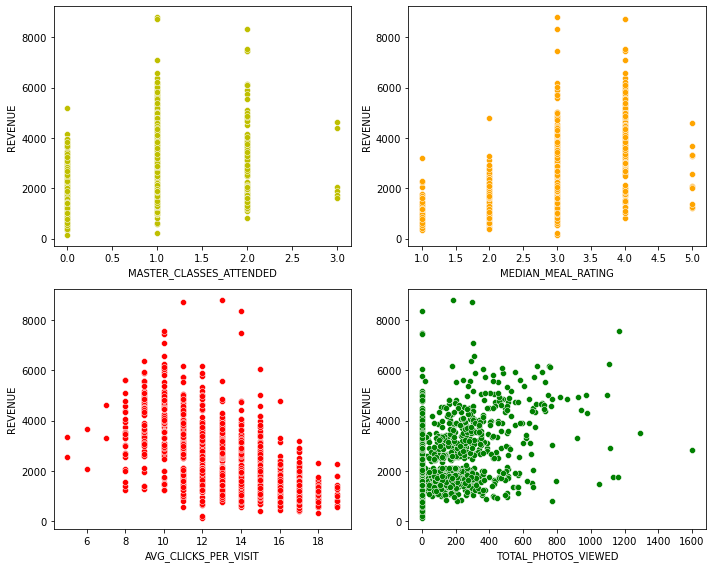

In [12]:
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CROSS_SELL_SUCCESS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_NUMBER'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TASTES_AND_PREFERENCES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PACKAGE_LOCKER'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('REFRIGERATED_LOCKER')


########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.tight_layout()
plt.show()

########################
########################

In [17]:
# setting outlier thresholds - data
TOTAL_MEALS_ORDERED_hi           = 280
UNIQUE_MEALS_PURCH_hi            = 9
CONTACTS_W_CUSTOMER_SERVICE_lo   = 2.5
CONTACTS_W_CUSTOMER_SERVICE_hi   = 10
AVG_TIME_PER_SITE_VISIT_hi       = 250
CANCELLATIONS_BEFORE_NOON_hi     = 7
CANCELLATIONS_AFTER_NOON_hi      = 1.5
MOBILE_LOGINS_hi                 = 6.5
MOBILE_LOGINS_lo                 = 4.5
PC_LOGINS_hi                     = 2.5
PC_LOGINS_lo                     = 0.5
WEEKLY_PLAN_hi                   = 20
EARLY_DELIVERIES_hi              = 5
LATE_DELIVERIES_hi               = 10
AVG_PREP_VID_TIME_hi             = 300
LARGEST_ORDER_SIZE_hi            = 6
MASTER_CLASSES_ATTENDED_hi       = 2
MEDIAN_MEAL_RATING_hi            = 4.5 
AVG_CLICKS_PER_VISIT_lo          = 7.5
TOTAL_PHOTOS_VIEWED_hi           = 470

# setting outlier thresholds - target
REVENUE_hi                       = 5500



##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
for index, value in original_df[['TOTAL_MEALS_ORDERED']].iterrows():
    if value[0] > TOTAL_MEALS_ORDERED_hi:
        original_df.loc[index, 'out_TOTAL_MEALS_ORDERED'] = 1   

# UNIQUE_MEALS_PURCH
original_df['out_UNIQUE_MEALS_PURCH'] = 0
for index, value in original_df[['UNIQUE_MEALS_PURCH']].iterrows():
    if value[0] > UNIQUE_MEALS_PURCH_hi:
        original_df.loc[index, 'out_UNIQUE_MEALS_PURCH'] = 1 


# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
for index, value in original_df[['CONTACTS_W_CUSTOMER_SERVICE']].iterrows():
    if value[0] > CONTACTS_W_CUSTOMER_SERVICE_hi:
        original_df.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] = 1         
for index, value in original_df[['CONTACTS_W_CUSTOMER_SERVICE']].iterrows():
    if value[0] < CONTACTS_W_CUSTOMER_SERVICE_lo:
        original_df.loc[index, 'out_CONTACTS_W_CUSTOMER_SERVICE'] = 1 



# AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
for index, value in original_df[['AVG_TIME_PER_SITE_VISIT']].iterrows():
    if value[0] > AVG_TIME_PER_SITE_VISIT_hi:
        original_df.loc[index, 'out_AVG_TIME_PER_SITE_VISIT'] = 1 



# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
for index, value in original_df[['CANCELLATIONS_BEFORE_NOON']].iterrows():
    if value[0] > CANCELLATIONS_BEFORE_NOON_hi:
        original_df.loc[index, 'out_CANCELLATIONS_BEFORE_NOON'] = 1 


# CANCELLATIONS_AFTER_NOON
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
for index, value in original_df[['CANCELLATIONS_AFTER_NOON']].iterrows():
    if value[0] > CANCELLATIONS_AFTER_NOON_hi:
        original_df.loc[index, 'out_CANCELLATIONS_AFTER_NOON'] = 1 


# MOBILE_LOGINS
original_df['out_MOBILE_LOGINS'] = 0
for index, value in original_df[['MOBILE_LOGINS']].iterrows():
    if value[0] > MOBILE_LOGINS_hi:
        original_df.loc[index, 'out_MOBILE_LOGINS'] = 1         
for index, value in original_df[['MOBILE_LOGINS']].iterrows():
    if value[0] < MOBILE_LOGINS_lo:
        original_df.loc[index, 'out_MOBILE_LOGINS'] = 1 


# PC_LOGINS
original_df['out_PC_LOGINS'] = 0
for index, value in original_df[['PC_LOGINS']].iterrows():
    if value[0] > PC_LOGINS_hi:
        original_df.loc[index, 'out_PC_LOGINS'] = 1         
for index, value in original_df[['PC_LOGINS']].iterrows():
    if value[0] < PC_LOGINS_lo:
        original_df.loc[index, 'out_PC_LOGINS'] = 1 


# WEEKLY_PLAN
original_df['out_WEEKLY_PLAN'] = 0
for index, value in original_df[['WEEKLY_PLAN']].iterrows():
    if value[0] > WEEKLY_PLAN_hi:
        original_df.loc[index, 'out_WEEKLY_PLAN'] = 1 


# EARLY_DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
for index, value in original_df[['EARLY_DELIVERIES']].iterrows():
    if value[0] > EARLY_DELIVERIES_hi:
        original_df.loc[index, 'out_EARLY_DELIVERIES'] = 1 

# LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
for index, value in original_df[['LATE_DELIVERIES']].iterrows():
    if value[0] > LATE_DELIVERIES_hi:
        original_df.loc[index, 'out_LATE_DELIVERIES'] = 1


# AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
for index, value in original_df[['AVG_PREP_VID_TIME']].iterrows():
    if value[0] > AVG_PREP_VID_TIME_hi:
        original_df.loc[index, 'out_AVG_PREP_VID_TIME'] = 1


# LARGEST_ORDER_SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
for index, value in original_df[['LARGEST_ORDER_SIZE']].iterrows():
    if value[0] > LARGEST_ORDER_SIZE_hi:
        original_df.loc[index, 'out_LARGEST_ORDER_SIZE'] = 1


# MASTER_CLASSES_ATTENDED
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
for index, value in original_df[['MASTER_CLASSES_ATTENDED']].iterrows():
    if value[0] > MASTER_CLASSES_ATTENDED_hi:
        original_df.loc[index, 'out_MASTER_CLASSES_ATTENDED'] = 1


# # MEDIAN_MEAL_RATING
# original_df['out_MEDIAN_MEAL_RATING'] = 0
# for index, value in original_df[['MEDIAN_MEAL_RATINGED']].iterrows():
#     if value[0] > MEDIAN_MEAL_RATING_hi:
#         original_df.loc[index, 'out_MEDIAN_MEAL_RATING'] = 1


# AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
for index, value in original_df[['AVG_CLICKS_PER_VISIT']].iterrows():
    if value[0] < AVG_CLICKS_PER_VISIT_lo:
        original_df.loc[index, 'out_AVG_CLICKS_PER_VISIT'] = 1

# TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
for index, value in original_df[['TOTAL_PHOTOS_VIEWED']].iterrows():
    if value[0] > TOTAL_PHOTOS_VIEWED_hi:
        original_df.loc[index, 'out_TOTAL_PHOTOS_VIEWED'] = 1

In [18]:
# setting trend-based thresholds
TOTAL_PHOTOS_VIEWED_change_at = 0 # zero inflated
CONTACTS_W_CUSTOMER_SERVICE_change_hi  = 10 # trend changes above this point
MEDIAN_MEAL_RATING_change_at_3 = 3 # inflated
MEDIAN_MEAL_RATING_change_at_4 = 4 # inflated
LARGEST_ORDER_SIZE_change_hi = 8 # trend changes above this point
TOTAL_MEALS_ORDERED_change_hi = 25 # trend changes


# TOTAL_PHOTOS_VIEWED
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
for index, value in original_df[['TOTAL_PHOTOS_VIEWED']].iterrows():
    if value[0] > TOTAL_PHOTOS_VIEWED_change_at:
        original_df.loc[index, 'change_TOTAL_PHOTOS_VIEWED'] = 1

        
# MEDIAN_MEAL_RATING_change_at_3
original_df['change_MEDIAN_MEAL_RATING_3'] = 0
for index, value in original_df[['MEDIAN_MEAL_RATING']].iterrows():
    if value[0] > MEDIAN_MEAL_RATING_change_at_3:
        original_df.loc[index, 'change_MEDIAN_MEAL_RATING_3'] = 1


# MEDIAN_MEAL_RATING_change_at_4
original_df['change_MEDIAN_MEAL_RATING_4'] = 0
for index, value in original_df[['MEDIAN_MEAL_RATING']].iterrows():
    if value[0] > MEDIAN_MEAL_RATING_change_at_4:
        original_df.loc[index, 'change_MEDIAN_MEAL_RATING_4'] = 1
        
# LARGEST_ORDER_SIZE
original_df['change_LARGEST_ORDER_SIZE'] = 0
for index, value in original_df[['LARGEST_ORDER_SIZE']].iterrows():
    if value[0] > LARGEST_ORDER_SIZE_change_hi:
        original_df.loc[index, 'change_LARGEST_ORDER_SIZE'] = 1


# TOTAL_MEALS_ORDERED
original_df['change_TOTAL_MEALS_ORDERED'] = 0
for index, value in original_df[['TOTAL_MEALS_ORDERED']].iterrows():
    if value[0] > TOTAL_MEALS_ORDERED_change_hi:
        original_df.loc[index, 'change_TOTAL_MEALS_ORDERED'] = 1


# CONTACTS_W_CUSTOMER_SERVICE
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0


for index, value in original_df[['CONTACTS_W_CUSTOMER_SERVICE']].iterrows():
    if value[0] > CONTACTS_W_CUSTOMER_SERVICE_change_hi:
        original_df.loc[index, 'change_CONTACTS_W_CUSTOMER_SERVICE'] = 1

In [ ]:
# # saving feature-rich dataset in Excel
# original_df.to_excel('original_df_feature_rich.xlsx',
#                  index = False)

In [19]:
# declaring set of x-variables (NEW3)
x_var = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
         'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
         'TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED','out_UNIQUE_MEALS_PURCH',
         'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_CANCELLATIONS_AFTER_NOON',
         'out_AVG_PREP_VID_TIME','change_CONTACTS_W_CUSTOMER_SERVICE',
         'drink_ordered','change_MEDIAN_MEAL_RATING_3', 'revenue_per_order',
         'change_MEDIAN_MEAL_RATING_4', 'change_TOTAL_MEALS_ORDERED']

In [20]:
# Preparing a DataFrame to scale the data and use for train/test split
chef_data   = original_df.loc[ : , x_var]


# Preparing the target variable
chef_target = np.log(original_df.loc[:, 'REVENUE'])

In [22]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()

# FITTING the scaler with housing_data
scaler.fit(chef_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# renaming column to concatenate
X_scaled_df.columns = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                       'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED',
                       'TOTAL_PHOTOS_VIEWED','out_TOTAL_MEALS_ORDERED','out_UNIQUE_MEALS_PURCH',
                       'out_CONTACTS_W_CUSTOMER_SERVICE', 'out_CANCELLATIONS_AFTER_NOON',
                       'out_AVG_PREP_VID_TIME','change_CONTACTS_W_CUSTOMER_SERVICE',
                       'drink_ordered','change_MEDIAN_MEAL_RATING_3', 'revenue_per_order',
                       'change_MEDIAN_MEAL_RATING_4', 'change_TOTAL_MEALS_ORDERED']

# checking the results
X_scaled_df.describe().round(2)


,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,TOTAL_PHOTOS_VIEWED,out_TOTAL_MEALS_ORDERED,out_UNIQUE_MEALS_PURCH,out_CONTACTS_W_CUSTOMER_SERVICE,out_CANCELLATIONS_AFTER_NOON,out_AVG_PREP_VID_TIME,change_CONTACTS_W_CUSTOMER_SERVICE,drink_ordered,change_MEDIAN_MEAL_RATING_3,revenue_per_order,change_MEDIAN_MEAL_RATING_4,change_TOTAL_MEALS_ORDERED
count,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00,1899.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.15,-1.56,-2.63,-2.36,-2.21,-0.94,-0.59,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,-1.65,-0.40,-1.39,-0.08,-2.84
25%,-0.65,-0.76,-0.87,-0.73,-0.92,-0.94,-0.59,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,-1.65,-0.40,-0.74,-0.08,0.35
50%,-0.27,0.04,0.01,-0.10,-0.28,0.61,-0.59,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,0.60,-0.40,-0.15,-0.08,0.35
75%,0.37,0.84,0.45,0.47,0.36,0.61,0.38,-0.10,-0.10,-0.36,-0.15,-0.09,-0.35,0.60,-0.40,0.45,-0.08,0.35
max,7.55,5.63,4.85,8.31,4.21,3.72,8.27,10.52,9.95,2.79,6.82,11.21,2.86,0.60,2.47,6.08,12.04,0.35


In [23]:
# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            X_scaled_df,
            chef_target,
            test_size = 0.25,
            random_state = 219)

In [24]:
# making a copy of X_scaled_df
chef_explanatory = X_scaled_df.copy()


# formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(f"original_df['{val}'] +")

original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_UNIQUE_MEALS_PURCH'] +
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['out_CANCELLATIONS_AFTER_NOON'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['drink_ordered'] +
original_df['change_MEDIAN_MEAL_RATING_3'] +
original_df['revenue_per_order'] +
original_df['change_MEDIAN_MEAL_RATING_4'] +
original_df['change_TOTAL_MEALS_ORDERED'] +


In [25]:
# building a ols stat model

# blueprinting a model type
lm_full = smf.ols(formula = """original_df['log_REVENUE'] ~ original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_UNIQUE_MEALS_PURCH'] +
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['out_CANCELLATIONS_AFTER_NOON'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['drink_ordered'] +
original_df['change_MEDIAN_MEAL_RATING_3'] +
original_df['revenue_per_order'] +
original_df['change_MEDIAN_MEAL_RATING_4'] +
original_df['change_TOTAL_MEALS_ORDERED']""",
                               data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     original_df['log_REVENUE']   R-squared:                       0.907
Model:                                    OLS   Adj. R-squared:                  0.906
Method:                         Least Squares   F-statistic:                     1016.
Date:                        Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                                23:29:32   Log-Likelihood:                 918.84
No. Observations:                        1899   AIC:                            -1800.
Df Residuals:                            1880   BIC:                            -1694.
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             5.7413      0.079     73.075      0.000       5.587       5.895
original_df['TOTAL_MEALS_ORDERED']                    0.0068      0.000     50.944      0.000       0.007       0.007
original_df['UNIQUE_MEALS_PURCH']                    -0.0087      0.001     -5.806      0.000      -0.012      -0.006
original_df['CONTACTS_W_CUSTOMER_SERVICE']            0.0272      0.003     10.616      0.000       0.022       0.032
original_df['AVG_PREP_VID_TIME']                      0.0019      0.000     12.838      0.000       0.002       0.002
original_df['LARGEST_ORDER_SIZE']                    -0.0195      0.004     -5.072      0.000      -0.027      -0.012
original_df['MASTER_CLASSES_ATTENDED']                0.0346      0.006      5.503      0.000       0.022       0.047
original_df['TOTAL_PHOTOS_VIEWED']                 4.829e-05   2.25e-05      2.146      0.032    4.16e-06    9.24e-05
original_df['out_TOTAL_MEALS_ORDERED']               -0.7380      0.043    -17.125      0.000      -0.823      -0.654
original_df['out_UNIQUE_MEALS_PURCH']                -0.2453      0.039     -6.256      0.000      -0.322      -0.168
original_df['out_CONTACTS_W_CUSTOMER_SERVICE']        0.0248      0.051      0.485      0.627      -0.075       0.125
original_df['out_CANCELLATIONS_AFTER_NOON']          -0.0383      0.024     -1.588      0.113      -0.086       0.009
original_df['out_AVG_PREP_VID_TIME']                 -0.1711      0.043     -3.977      0.000      -0.256      -0.087
original_df['change_CONTACTS_W_CUSTOMER_SERVICE']    -0.7018      0.095     -7.380      0.000      -0.888      -0.515
original_df['drink_ordered']                          0.1778      0.012     14.741      0.000       0.154       0.202
original_df['change_MEDIAN_MEAL_RATING_3']            0.1241      0.013      9.645      0.000       0.099       0.149
original_df['revenue_per_order']                      0.0154      0.000     48.933      0.000       0.015       0.016
original_df['change_MEDIAN_MEAL_RATING_4']           -0.1108      0.043     -2.562      0.010      -0.196      -0.026
original_df['change_TOTAL_MEALS_ORDERED']             0.3180      0.076      4.204      0.000       0.170       0.466
==============================================================================
Omnibus:                      121.479   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.933
Skew:                          -0.520   Prob(JB):                     6.96e-41
Kurtosis:                       4.121   Cond. No.                     9.87e+03
====

In [46]:
# Linear Model
# INSTANTIATING a model object
lr = sklearn.linear_model.LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)

lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

Training Score: 0.9022
Testing Score: 0.9178


In [50]:
# zipping each feature name to its coefficient
lr_model_values = zip(original_df[X_scaled_df.columns].columns,
                     lr_fit.coef_.round(decimals = 4))

# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 4))]

# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)

In [33]:
# preparing explanatory variable data
original_data = original_df.drop(['REVENUE', 'log_REVENUE', 'EMAIL', 'NAME',
                          'FIRST_NAME', 'FAMILY_NAME', 'junk'], axis = 1)

# preparing response variables
log_original_target = original_df.loc[ : , 'log_REVENUE']

# preparing training and testing sets for log_revenue
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(
            original_data,
            log_original_target,
            test_size = 0.25,
            random_state = 219)

In [34]:
# importing library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# using hyperparameter tuning
param_grid = {'alpha': np.arange(0.1, 1.1, 0.1)}
lasso = sklearn.linear_model.Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv = 10)
lasso_cv.fit(X_train, y_train)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

# saving best score as a variable
lass_best_param = lasso_cv.best_params_['alpha']

{'alpha': 0.1}
0.5474573191658192


In [37]:
#ARD Model

# instantiating a model object
ard = sklearn.linear_model.ARDRegression()

# fitting to training data 
ard_fit = ard.fit(X_train, y_train)

# predicting on new data
ard_pred = ard_fit.predict(X_test)

# scoring the results
print('ARD Training Score :', ard.score(X_train, y_train).round(4))  # using R-square
print('ARD Testing Score  :',  ard.score(X_test, y_test).round(4)) # using R-square

ard_train_score = ard.score(X_train, y_train).round(4)
ard_test_score  = ard.score(X_test, y_test).round(4)

# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

ARD Training Score : 0.9018
ARD Testing Score  : 0.9176
ARD Train-Test Gap : 0.0158


In [39]:
# zipping each feature name to its coefficient
ard_model_values = zip(original_df.columns, ard_fit.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)

In [40]:
# dropping coefficients that are equal to zero
for feature, coefficient in ard_model_lst:  
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

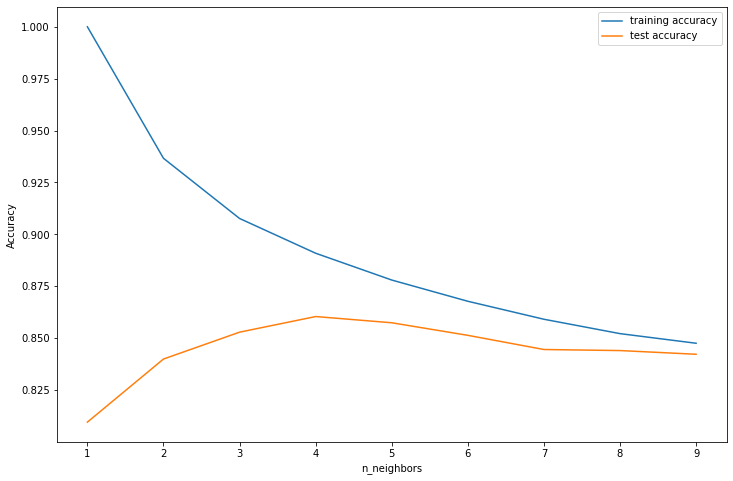

The optimal number of neighbors is 4
Training Score: 0.8909
Testing Score: 0.8604


In [44]:
# KNN Model

# First part to find optimal k

# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy = []


# building a visualization of 1 to 10 neighbors
neighbors_settings = range(1, 10)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

# second part - model

# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt.predict(X_test)



# SCORING the results
print('Training Score:', knn_opt.score(X_train, y_train).round(4))
print('Testing Score:',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)

knn_test_gap = abs(knn_opt_score_train - knn_opt_score_test).round(decimals = 4)

In [42]:
# Model Performance

print(f"""
Model                 Train Score      Test Score
----------------      ----------       ----------
Linear                {lr_train_score}           {lr_test_score}
KNN                   {knn_opt_score_train}           {knn_opt_score_test}
ARD                   {ard_train_score}           {ard_test_score}

OLS R-Squared = 0.911

Gradient & RF model have over-fitting.
The best model is Elastic Model.

""")


Model                 Train Score      Test Score
----------------      ----------       ----------
Linear                0.9022           0.9178
KNN                   0.8909           0.8604
ARD                   0.9018           0.9176

OLS R-Squared = 0.911

Gradient & RF model have over-fitting.
The best model is Elastic Model.




In [52]:
# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS (Final Model)', 'ARD', 'KNN'],
           
    'Training Score' : [lr_train_score, ard_train_score, knn_opt_score_train],
           
    'Testing Score'  : [lr_test_score,
                  ard_test_score, knn_opt_score_test],
                    
    'Train-Test Gap' : [lr_test_gap,
                        ard_test_gap, knn_test_gap],
                    
    'Model Size' : [len(lr_model_lst),
                    len(ard_model_lst), 'N/A'],
                    
    'Model Coeffs and Variables' : [lr_model_lst, ard_model_lst, 'N/A']}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

# calling the model_performance variable
model_performance

,Model Type,Training Score,Testing Score,Train-Test Gap,Model Size,Model Coeffs and Variables
0,OLS (Final Model),0.9022,0.9178,0.0156,19,"[(intercept, 7.53), (TOTAL_MEALS_ORDERED, 0.38..."
1,ARD,0.9018,0.9176,0.0158,17,"[(intercept, 7.5301), (REVENUE, 0.3823), (CROS..."
2,KNN,0.8909,0.8604,0.0305,N/A,N/A
